In [23]:
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [8]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)zip_file_path = "/content/flower.zip"
extract_path = "flowers"


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [9]:
#parameters
img_height, img_width = 150, 150
batch_size = 32

In [10]:
#imageDataGen to load images
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2  # Use 20% of the data for validation
)

train_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='validation'
)


Found 265 images belonging to 2 classes.
Found 65 images belonging to 2 classes.


In [11]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))#o/p layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10  )

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 652ms/step - accuracy: 0.7696 - loss: 1.0000 - val_accuracy: 0.8281 - val_loss: 0.4568
Epoch 2/10
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6875 - loss: 0.7219

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.6875 - loss: 0.7219 - val_accuracy: 1.0000 - val_loss: 0.4149
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.7969 - loss: 0.5158 - val_accuracy: 0.8281 - val_loss: 0.4656
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8750 - loss: 0.4006 - val_accuracy: 1.0000 - val_loss: 0.1904
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.8089 - loss: 0.4995 - val_accuracy: 0.8281 - val_loss: 0.4798
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8438 - loss: 0.4629 - val_accuracy: 1.0000 - val_loss: 0.2032
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.8346 - loss: 0.4346 - val_accuracy: 0.8281 - val_loss: 0.5200
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7778 - loss: 0.4826 - val_accuracy: 1.0000 - val_loss: 0.1395
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.8312 - loss: 0.4400 - val_accuracy: 0.8438 - val_loss: 0.5119
Epoch 1

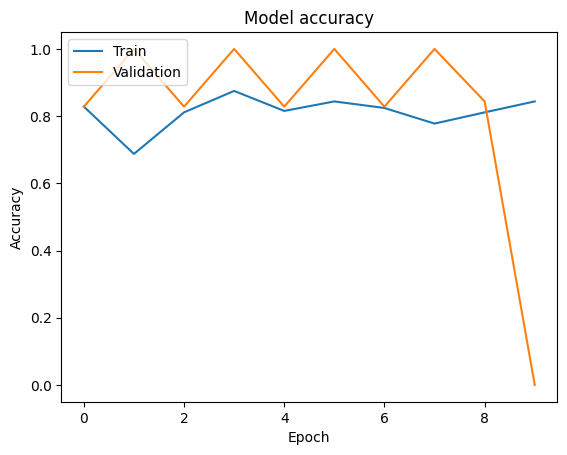

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


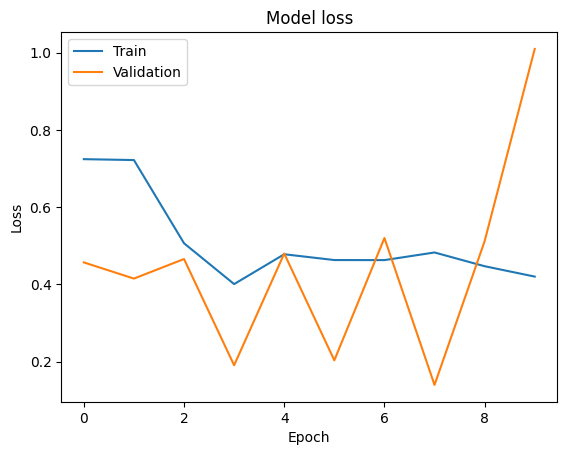

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
validation_generator.reset()  # Reset the generator to get predictions for the entire validation set
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step


In [16]:
# Get the true labels from the validation generator
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

In [19]:
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

    training       0.83      1.00      0.91        54
  validation       0.00      0.00      0.00        11

    accuracy                           0.83        65
   macro avg       0.42      0.50      0.45        65
weighted avg       0.69      0.83      0.75        65



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)

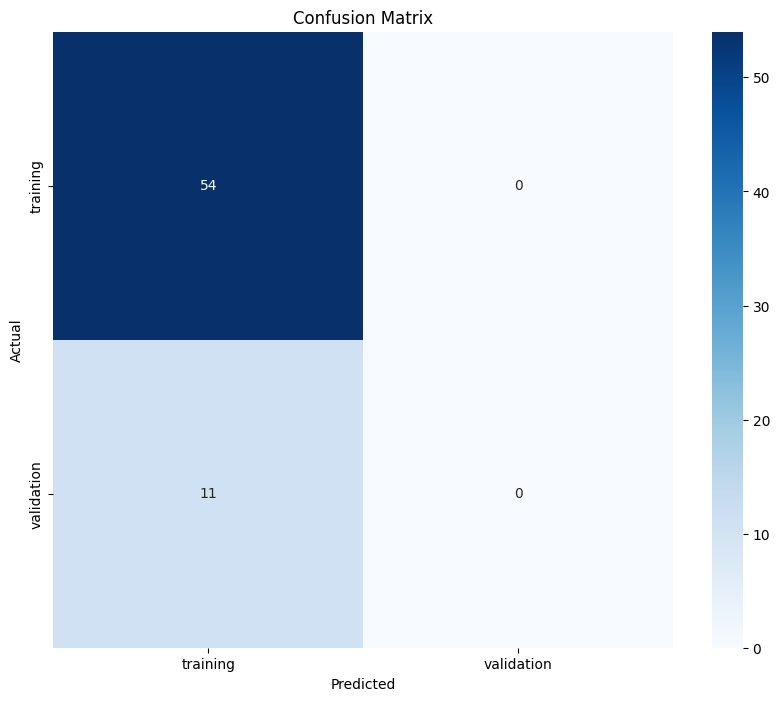

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()